# EG01-24
** Deployment & Comparison of Prediction Method Plots **

These plots were used in the DDCA Journal Article (https://github.com/arfc/2019-ddca-journal-article), Demonstration of Demand Driven Deployment Capabilities in Cyclus Global Presentation (https://github.com/arfc/2019-chee-global), and the DDCA final quarterly report (https://github.com/arfc/ddca_numerical_exp). 

To generate the plots in this Jupyter Notebook, you must go to the ARFC Fuel-Cycle Box (fuel-cycle/cyclus_output/d3ploy-transition-scenarios/eg01-eg24) and download the following sqlite files: 
* eg01-eg24-linpower-d3ploy-buffer6000-fft.sqlite
* eg01-eg24-linpower-d3ploy-buffer0-ma.sqlite
* eg01-eg24-linpower-d3ploy-buffer0-arma.sqlite
* eg01-eg24-linpower-d3ploy-buffer0-arch.sqlite
* eg01-eg24-linpower-d3ploy-buffer0-poly.sqlite
* eg01-eg24-linpower-d3ploy-buffer0-exp_smoothing.sqlite
* eg01-eg24-linpower-d3ploy-buffer0-holt_winters.sqlite
* eg01-eg24-linpower-d3ploy-buffer0-fft.sqlite
* eg01-eg24-linpower-d3ploy-buffer0-sw_seasonal.sqlite
* eg01-eg24-linpower-d3ploy-buffer2000-fft.sqlite
* eg01-eg24-linpower-d3ploy-buffer4000-fft.sqlite
* eg01-eg24-linpower-d3ploy-buffer8000-fft.sqlite

In [1]:
import sys 
sys.path.insert(0, '../../scripts/')
import transition_plots as tp

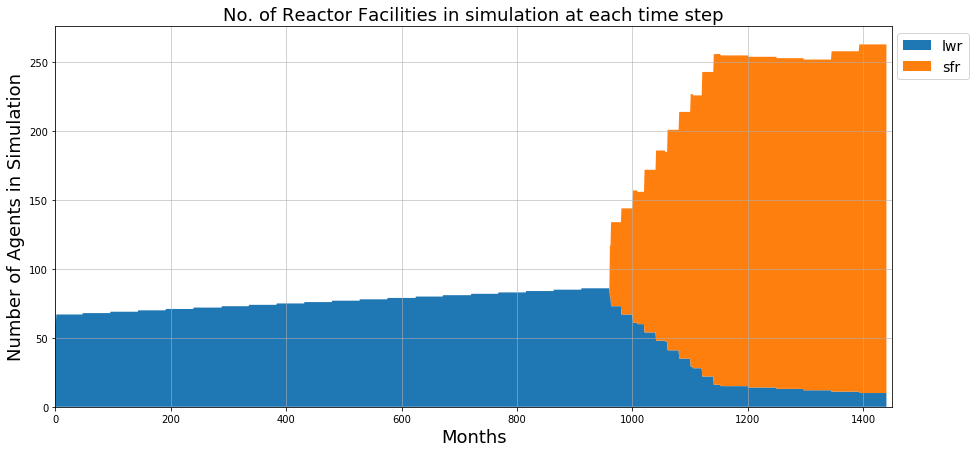

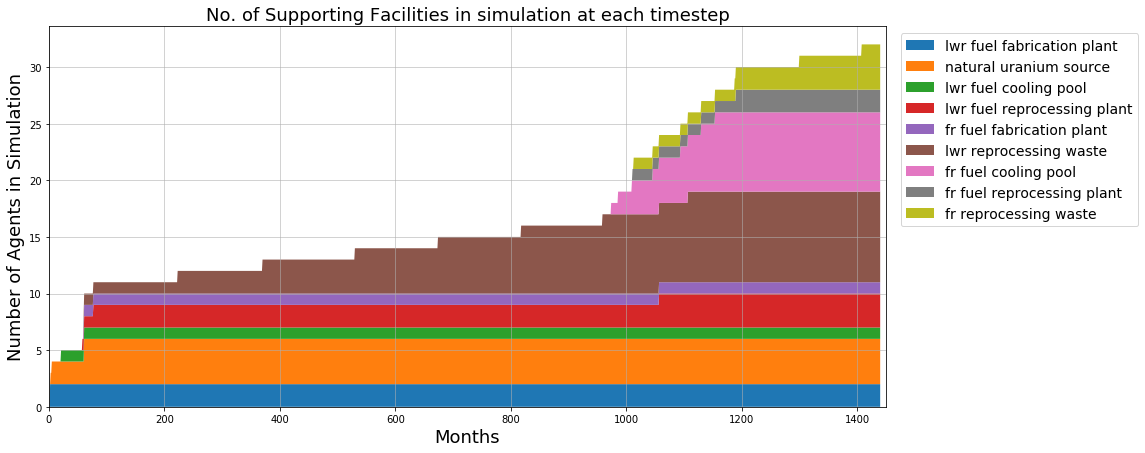

In [3]:
sqlite24= 'eg01-eg24-linpower-d3ploy-buffer6000-fft.sqlite'
all_agents24 = tp.format_agent_dict(sqlite24)
tp.plot_agents(all_agents24,name='eg24-stack')

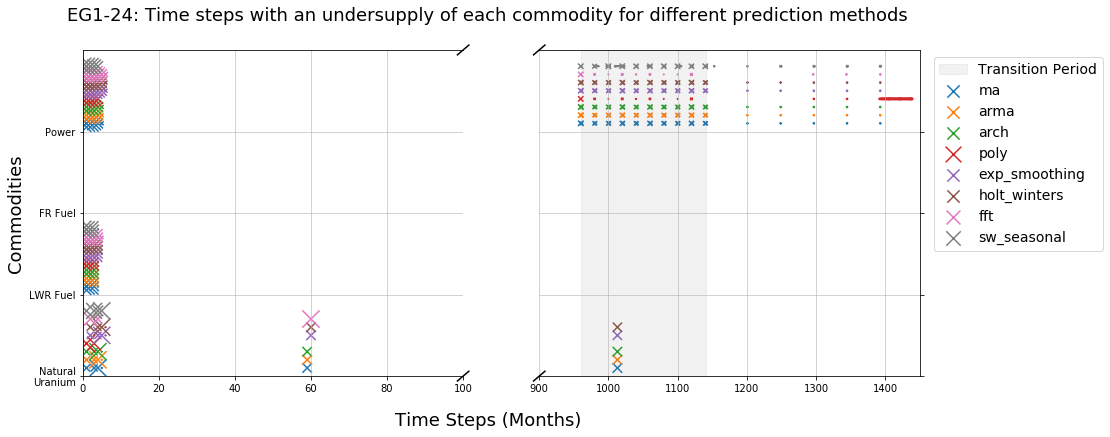

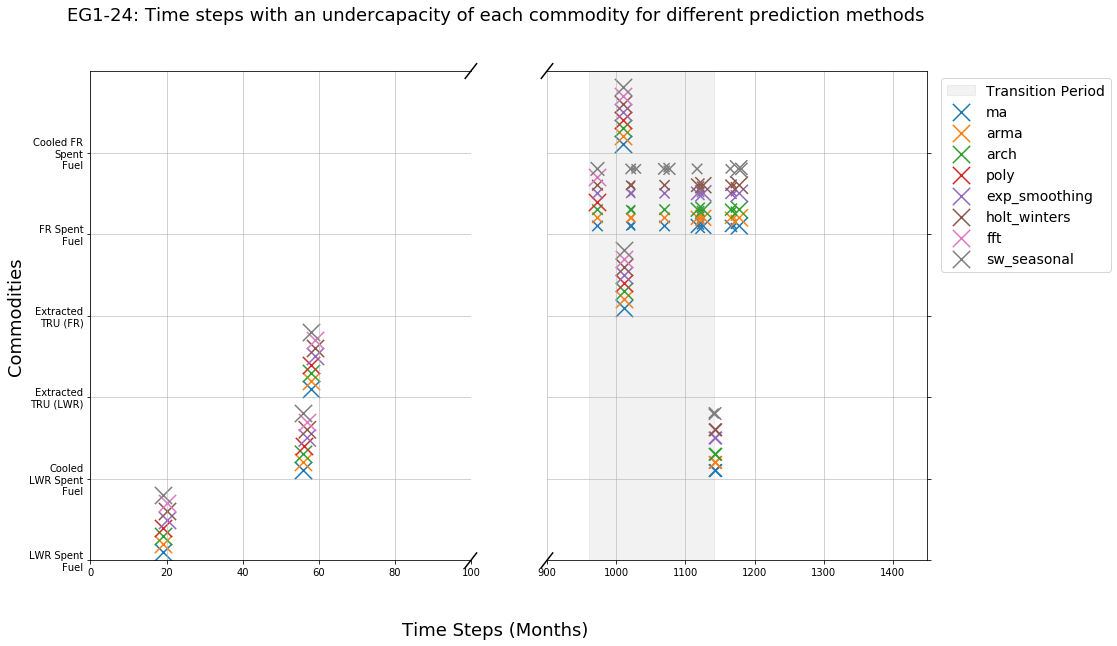

In [4]:
commods = ['sourceout',
           'enrichmentout',
           'mixerout',
           'power']
commodnames = ['Natural Uranium',
               'LWR Fuel',
               'FR Fuel',
               'Power']
methods = ['ma','arma','arch','poly','exp_smoothing','holt_winters','fft','sw_seasonal']
general_sqlite = 'eg01-eg24-linpower-d3ploy-buffer0-'
tp.plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_driven=True,demand_eq='60000 + 250*t/12',
                     title='EG1-24: Time steps with an undersupply of each commodity for different prediction methods',
                    name = 'eg24-undersupply')

commods = ['lwrout',
           'lwrstorageout',
           'lwrtru',
           'frtru',
           'frout',
           'frstorageout']
commodnames = ['LWR Spent Fuel',
               'Cooled LWR Spent Fuel',
               'Extracted TRU (LWR)',
               'Extracted TRU (FR)',
               'FR Spent Fuel',
               'Cooled FR Spent Fuel']
methods = ['ma','arma','arch','poly','exp_smoothing','holt_winters','fft','sw_seasonal']
general_sqlite = 'eg01-eg24-linpower-d3ploy-buffer0-'
tp.plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_driven=False,
                    title='EG1-24: Time steps with an undercapacity of each commodity for different prediction methods',
                    name = 'eg24-undercapacity')

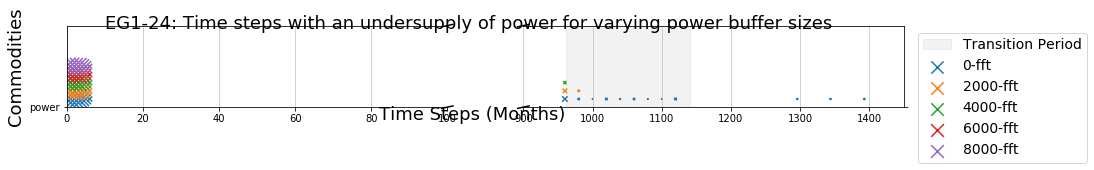

In [5]:
commods = ['power']
commodnames = ['power']
methods = ['0-fft','2000-fft','4000-fft','6000-fft','8000-fft']
general_sqlite = 'eg01-eg24-linpower-d3ploy-buffer'
tp.plot_all_undersupply(commods,commodnames,methods,general_sqlite,demand_eq='60000 + 250*t/12',
                     title='EG1-24: Time steps with an undersupply of power for varying power buffer sizes ',
                     name='eg24-sa')

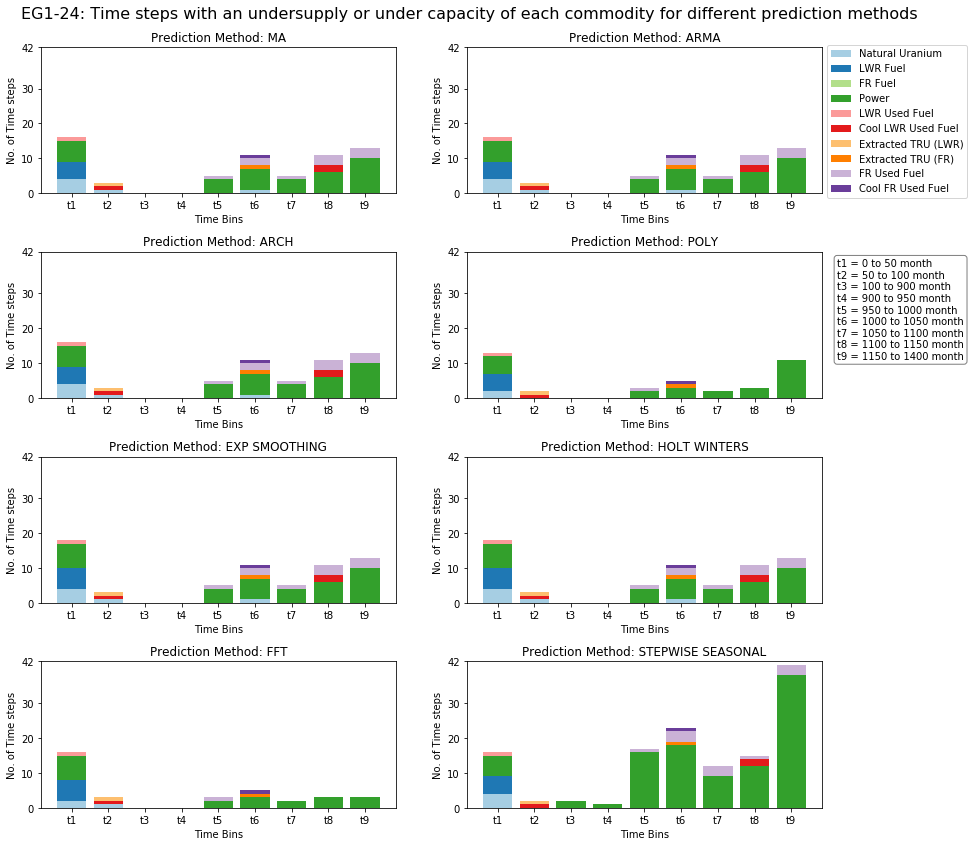

In [9]:
commods1 = ['sourceout',
           'enrichmentout',
           'mixerout',
           'power']
commodnames1 = ['Natural Uranium',
               'LWR Fuel',
               'FR Fuel',
               'Power']
commods2 = ['lwrout',
           'lwrstorageout',
           'lwrtru',
           'frtru',
           'frout',
           'frstorageout']
commodnames2 = ['LWR Used Fuel',
               'Cool LWR Used Fuel',
               'Extracted TRU (LWR)',
               'Extracted TRU (FR)',
               'FR Used Fuel',
               'Cool FR Used Fuel']
methods = ['ma','arma','arch','poly','exp_smoothing','holt_winters','fft','sw_seasonal']
methodnames = ['MA','ARMA','ARCH','POLY','EXP SMOOTHING','HOLT WINTERS','FFT', 'STEPWISE SEASONAL']
general_sqlite = 'eg01-eg24-linpower-d3ploy-buffer0-'
demand_driven = True
demand_eq='60000+250*t/12'
title = 'EG1-24: Time steps with an undersupply or under capacity of each commodity for different prediction methods'
name = 'eg01-24-histogram'
yticks=[0,10,20,30,42]
tp.plot_histogram(commods1,commodnames1,commods2,commodnames2,methods,methodnames,general_sqlite,demand_eq,title,name,yticks)